In [7]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt


In [13]:
# # This script fetches data from the Fiscal Data API and saves it as a CSV file.
# # It uses the requests library to make API calls and pandas to handle data manipulation.
# # The API endpoint provides information about the operating cash balance of the U.S. Treasury.
base_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/"
endpoint = "v1/accounting/dts/operating_cash_balance"
API =base_url+endpoint

In [14]:


try:
    # Attempt to fetch data from the API. 
    # Using raise_for_status() ensures we catch HTTP errors (like 404 or 500) immediately.
    response = requests.get(API)
    response.raise_for_status()
except requests.exceptions.HTTPError as e:
    # Handle cases where the API returned an error response (e.g., invalid endpoint)
    print(f"HTTP error: {e}")
except requests.exceptions.RequestException as e:
    # Catch other potential request issues: network problems, timeouts, DNS failures
    print(f"Request failed: {e}")
else:
    # Only runs if the request was successful
    # Convert JSON response into a DataFrame for further analysis
    data = response.json()  # Extract the 'data' key from JSON
    df = pd.DataFrame(data['data'])
    print("DataFrame created")  # Confirm successful creation


DataFrame created


In [15]:
df.isna().sum()  #checks for NaN

record_date                0
account_type               0
close_today_bal            0
open_today_bal             0
open_month_bal             0
open_fiscal_year_bal       0
table_nbr                  0
table_nm                   0
sub_table_name             0
src_line_nbr               0
record_fiscal_year         0
record_fiscal_quarter      0
record_calendar_year       0
record_calendar_quarter    0
record_calendar_month      0
record_calendar_day        0
dtype: int64

In [16]:
#Initial exploration
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   record_date              100 non-null    object
 1   account_type             100 non-null    object
 2   close_today_bal          100 non-null    object
 3   open_today_bal           100 non-null    object
 4   open_month_bal           100 non-null    object
 5   open_fiscal_year_bal     100 non-null    object
 6   table_nbr                100 non-null    object
 7   table_nm                 100 non-null    object
 8   sub_table_name           100 non-null    object
 9   src_line_nbr             100 non-null    object
 10  record_fiscal_year       100 non-null    object
 11  record_fiscal_quarter    100 non-null    object
 12  record_calendar_year     100 non-null    object
 13  record_calendar_quarter  100 non-null    object
 14  record_calendar_month    100 non-null    ob

,record_date,account_type,close_today_bal,open_today_bal,open_month_bal,open_fiscal_year_bal,table_nbr,table_nm,sub_table_name,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2005-10-03,Federal Reserve Account,5448,4381,4381,4381,I,Operating Cash Balance,Type of account,1,2006,1,2005,4,10,03
1,2005-10-03,Tax and Loan Note Accounts (Table V),9295,31300,31300,31300,I,Operating Cash Balance,Type of account,2,2006,1,2005,4,10,03
2,2005-10-04,Federal Reserve Account,4976,5448,4381,4381,I,Operating Cash Balance,Type of account,1,2006,1,2005,4,10,04
3,2005-10-04,Tax and Loan Note Accounts (Table V),4555,9295,31300,31300,I,Operating Cash Balance,Type of account,2,2006,1,2005,4,10,04
4,2005-10-05,Federal Reserve Account,4786,4976,4381,4381,I,Operating Cash Balance,Type of account,1,2006,1,2005,4,10,05


In [17]:
# Convert 'close_today_bal' and 'open_today_bal' to numeric.
# Ensures calculations won't fail if API returned strings.
df["close_today_bal"] = pd.to_numeric(df["close_today_bal"])
df["open_today_bal"] = pd.to_numeric(df["open_today_bal"])

In [18]:
# Create a MultiIndex (record_date, account_type) for easier slicing and group operations
viewable = df.set_index(["record_date", "account_type"]).sort_index() 

# Remove unnecessary column that doesn't add information
viewable.drop(columns=["src_line_nbr"], inplace=True) 

# Calculate daily change and percent change to track account activity
viewable["daily_change"] = viewable["close_today_bal"] - viewable["open_today_bal"]
viewable["daily_pct_change"] = (viewable["daily_change"] / viewable["open_today_bal"]) * 100

# Display first few rows to verify calculations
viewable.head()

close_today_bal  \
record_date account_type                                            
2005-10-03  Federal Reserve Account                          5448   
            Tax and Loan Note Accounts (Table V)             9295   
2005-10-04  Federal Reserve Account                          4976   
            Tax and Loan Note Accounts (Table V)             4555   
2005-10-05  Federal Reserve Account                          4786   

                                                  open_today_bal  \
record_date account_type                                           
2005-10-03  Federal Reserve Account                         4381   
            Tax and Loan Note Accounts (Table V)           31300   
2005-10-04  Federal Reserve Account                         5448   
            Tax and Loan Note Accounts (Table V)            9295   
2005-10-05  Federal Reserve Account                         4976   

                                                 open_month_bal  \
record_date account_type                                          
2005-10-03  Federal Reserve Account                        4381   
            Tax and Loan Note Accounts (Table V)          31300   
2005-10-04  Federal Reserve Account                        4381   
            Tax and Loan Note Accounts (Table V)          31300   
2005-10-05  Federal Reserve Account                        4381   

                                                 open_fiscal_year_bal  \
record_date account_type                                                
2005-10-03  Federal Reserve Account                              4381   
            Tax and Loan Note Accounts (Table V)                31300   
2005-10-04  Federal Reserve Account                              4381   
            Tax and Loan Note Accounts (Table V)                31300   
2005-10-05  Federal Reserve Account                              4381   

                                                 table_nbr  \
record_date account_type                                     
2005-10-03  Federal Reserve Account                      I   
            Tax and Loan Note Accounts (Table V)         I   
2005-10-04  Federal Reserve Account                      I   
            Tax and Loan Note Accounts (Table V)         I   
2005-10-05  Federal Reserve Account                      I   

                                                                table_nm  \
record_date account_type                                                   
2005-10-03  Federal Reserve Account               Operating Cash Balance   
            Tax and Loan Note Accounts (Table V)  Operating Cash Balance   
2005-10-04  Federal Reserve Account               Operating Cash Balance   
            Tax and Loan Note Accounts (Table V)  Operating Cash Balance   
2005-10-05  Federal Reserve Account               Operating Cash Balance   

                                                   sub_table_name  \
record_date account_type                                            
2005-10-03  Federal Reserve Account               Type of account   
            Tax and Loan Note Accounts (Table V)  Type of account   
2005-10-04  Federal Reserve Account               Type of account   
            Tax and Loan Note Accounts (Table V)  Type of account   
2005-10-05  Federal Reserve Account               Type of account   

                                                 record_fiscal_year  \
record_date account_type                                              
2005-10-03  Federal Reserve Account                            2006   
            Tax and Loan Note Accounts (Table V)               2006   
2005-10-04  Federal Reserve Account                            2006   
            Tax and Loan Note Accounts (Table V)               2006   
2005-10-05  Federal Reserve Account                            2006   

                                                 record_fiscal_quarter  \
record_date account_type                                                 
2005-10-0

In [19]:
# Remove columns that only have a single unique value, since they add no analytical value
df = df.drop(columns=df.columns[df.nunique() == 1])  

# Convert 'record_date' to datetime so we can use it for time-based operations like resampling
df['record_date'] = pd.to_datetime(df['record_date'])  

# Drop columns that are redundant or no longer needed after converting 'record_date' to datetime
df = df.drop(columns=["src_line_nbr", "record_calendar_month", "record_calendar_day"])

# Set 'record_date' as the index to enable resampling
df = df.set_index('record_date')  

# Compute weekly average of 'close_today_bal' to analyze trends over time
weekly_average = df["close_today_bal"].resample("W").mean()  
weekly_average

record_date
2005-10-09     7020.100
2005-10-16     5290.750
2005-10-23    14359.400
2005-10-30    15800.500
2005-11-06    11942.400
2005-11-13     5998.875
2005-11-20     7025.400
2005-11-27     5911.500
2005-12-04     5865.800
2005-12-11     4398.100
2005-12-18     6062.000
Freq: W-SUN, Name: close_today_bal, dtype: float64

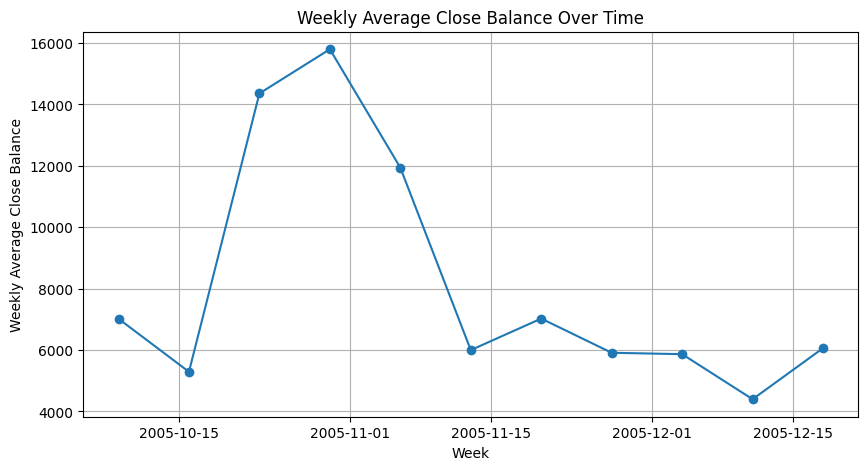

In [20]:
# Plot the weekly average closing balance to visualize trends over time.
# Using markers to highlight individual weeks.
plt.figure(figsize=(10,5))
plt.plot(weekly_average.index, weekly_average.values, marker='o')
plt.xlabel("Week")
plt.ylabel("Weekly Average Close Balance")
plt.title("Weekly Average Close Balance Over Time")
plt.grid(True)
plt.show()


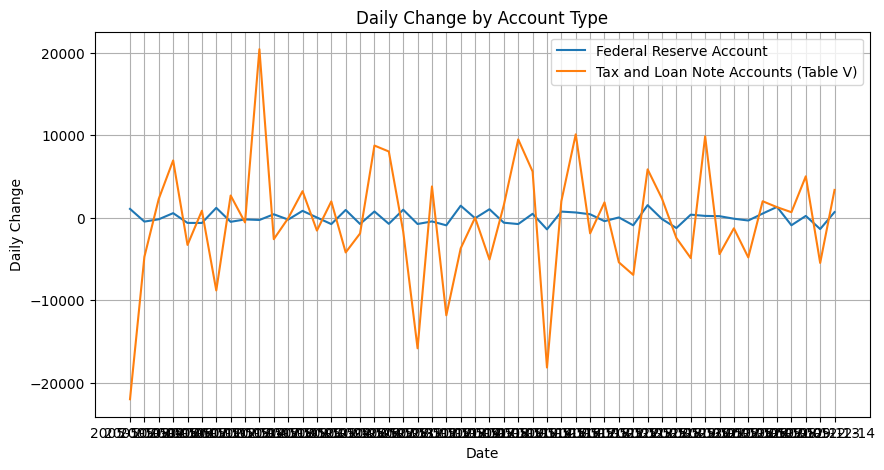

In [21]:
# Plot daily changes for each account type using a MultiIndex DataFrame

plt.figure(figsize=(10, 5))

# Loop through each unique account type in the MultiIndex
for account in viewable.index.get_level_values('account_type').unique():
    # Select all rows corresponding to this account type
    group = viewable.xs(account, level='account_type')
    
    # Plot daily change for this account type
    plt.plot(group.index, group['daily_change'], label=account)

# Add labels and title for clarity
plt.xlabel('Date')  # x-axis: record_date
plt.ylabel('Daily Change')  # y-axis: close_today_bal change
plt.title('Daily Change by Account Type')

# Add legend to differentiate account types
plt.legend()

# Add grid to improve readability of trends and spikes
plt.grid(True)

plt.show()